Data sample:
        0   1   2   3   4   5   6   7   8   9   10
0  1000025   5   1   1   1   2   1   3   1   1   2
1  1002945   5   4   4   5   7  10   3   2   1   2
2  1015425   3   1   1   1   2   2   3   1   1   2
3  1016277   6   8   8   1   3   4   3   7   1   2
4  1017023   4   1   1   3   2   1   3   1   1   2

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       699 non-null    int64 
 1   1       699 non-null    int64 
 2   2       699 non-null    int64 
 3   3       699 non-null    int64 
 4   4       699 non-null    int64 
 5   5       699 non-null    int64 
 6   6       699 non-null    object
 7   7       699 non-null    int64 
 8   8       699 non-null    int64 
 9   9       699 non-null    int64 
 10  10      699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB
None

Distribusi Kelas:
Diagnosis
0    

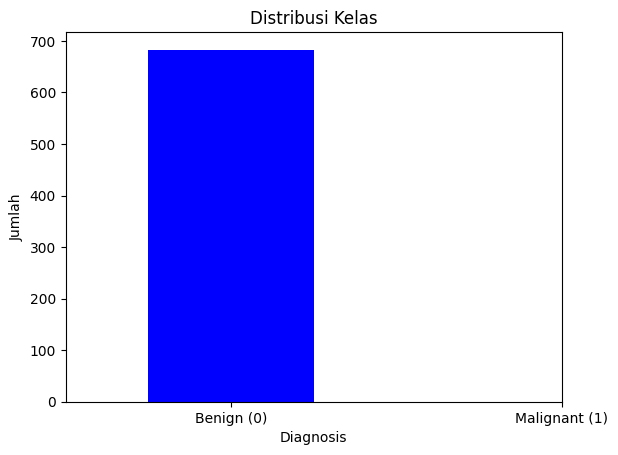

Matriks Kebingungan:
[[137]]

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       137

    accuracy                           1.00       137
   macro avg       1.00      1.00      1.00       137
weighted avg       1.00      1.00      1.00       137



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [12]:
# knn_large.py

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Memuat dataset dari UCI
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/breast-cancer-wisconsin.data"
df = pd.read_csv(url, header=None)

# Tampilkan beberapa baris pertama dari dataset
print("Data sample:")
print(df.head())

# Tampilkan informasi mengenai DataFrame
print("\nDataFrame Info:")
print(df.info())

# Mengganti nilai '?' dengan NaN
df.replace('?', np.nan, inplace=True)

# Menghapus baris dengan nilai NaN
df.dropna(inplace=True)

# Mengganti nama kolom
df.columns = ['ID', 'Diagnosis', 'Radius_mean', 'Texture_mean', 'Perimeter_mean',
              'Area_mean', 'Smoothness_mean', 'Compactness_mean', 'Concavity_mean',
              'Concave_points_mean', 'Symmetry_mean']

# Menghapus kolom ID
df.drop(columns=['ID'], inplace=True)

# Mengonversi diagnosis menjadi numerik (1: Malignant, 0: Benign)
df['Diagnosis'] = df['Diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

# Menghitung distribusi kelas
print("\nDistribusi Kelas:")
class_counts = df['Diagnosis'].value_counts()
print(class_counts)

# Memvisualisasikan distribusi kelas
class_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribusi Kelas')
plt.xlabel('Diagnosis')
plt.ylabel('Jumlah')
plt.xticks(ticks=[0, 1], labels=['Benign (0)', 'Malignant (1)'], rotation=0)
plt.show()

# Memisahkan fitur dan label
X = df.drop(columns=['Diagnosis'])
y = df['Diagnosis']

# Mengonversi semua kolom ke tipe float
X = X.astype(float)

# Membagi dataset menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalisasi data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Menginisialisasi model K-NN
k = 5  # Anda bisa mengubah nilai k
knn = KNeighborsClassifier(n_neighbors=k)

# Melatih model
knn.fit(X_train, y_train)

# Melakukan prediksi
y_pred = knn.predict(X_test)

# Menampilkan hasil
print("Matriks Kebingungan:")
print(confusion_matrix(y_test, y_pred))
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))
